In [0]:
 # Use GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive

In [0]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/COMP5703')
os.getcwd()

'/content/drive/My Drive/COMP5703'

In [0]:
#import library
import pandas as pd
import numpy as np
from glob import glob
import fnmatch
import cv2

In [0]:
X1=np.load('X_new.npy')
Y1=np.load('Y_new.npy')

In [0]:
X=X1[0:40000]
Y=Y1[0:40000]

In [0]:
import matplotlib.pylab as plt
import itertools
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
itertools

import keras
from keras import backend, Model
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D, Input, concatenate, Add, AveragePooling2D, LeakyReLU
from keras.initializers import glorot_uniform

Using TensorFlow backend.


In [0]:
x_sub = np.array(X)
x_sub=x_sub/255.0
x_sub_shape = x_sub.shape[1] * x_sub.shape[2] * x_sub.shape[3]
x_flat = x_sub.reshape(x_sub.shape[0], x_sub_shape)

In [0]:
r = pd.value_counts(Y)
print(r)
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(ratio='auto')
x_flat_resample,y_sub_resample=rus.fit_sample(x_flat,Y)
len(x_flat_resample)
r = pd.value_counts(y_sub_resample)
print(r)

0    30556
1     9444
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1    9444
0    9444
dtype: int64


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_flat_resample, y_sub_resample, test_size=0.2, random_state = 2) # 0.2 test_size means 20%

In [0]:
from keras.utils.np_utils import to_categorical
Y_train_c = to_categorical(y_train, num_classes = 2)
Y_test_c = to_categorical(y_test, num_classes = 2)

In [0]:
for i in range(len(X_train)):
    height, width, channels = 50,50,3
    X_train_reshape = X_train.reshape(len(X_train),height,width,channels)

for i in range(len(X_test)):
    height, width, channels = 50,50,3
    X_test_reshape = X_test.reshape(len(X_test),height,width,channels)


dfRos = pd.DataFrame()
dfRos["labels"]=y_train
labRos = dfRos['labels']

In [0]:
r = pd.value_counts(y_train)
print(r)

0    7569
1    7541
dtype: int64


In [0]:
print(X_train_reshape.shape)
print(Y_train_c.shape)
print(X_test_reshape.shape)
print(Y_test_c.shape)

(15110, 50, 50, 3)
(15110, 2)
(3778, 50, 50, 3)
(3778, 2)


In [0]:
inp=Input(shape=(50, 50, 3))

def identity_block(X, f, filters, stage, block):
 
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
 
    F1, F2, F3 = filters
 
    X_shortcut = X
 
    X = Conv2D(filters = F1, kernel_size = (1,1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
 
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
 
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
 
    return X

def convolution_block(X, f, filters, stage, block, s=2):
 
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
 
    X_shortcut = X
 
    X = Conv2D(filters = F1, kernel_size = (1,1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
 
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
 
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
 
    X_shortcut = Conv2D(F3, (1,1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name=bn_name_base + '1')(X_shortcut)
 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
 
    return X

X = ZeroPadding2D((3, 3))(inp)
 
X = Conv2D(64, (7, 7), strides = (2,2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides = (2,2))(X)
 
X = convolution_block(X, f = 3, filters = [64,64,256], stage = 2, block = 'a', s = 1)
X = identity_block(X, 3, [64,64,256], stage=2, block='b')
X = identity_block(X, 3, [64,64,256], stage=2, block='c')
 
X = convolution_block(X, f = 3, filters = [128,128,512], stage = 3, block = 'a', s = 2)
X = identity_block(X, 3, [128,128,512], stage=3, block='b')
X = identity_block(X, 3, [128,128,512], stage=3, block='c')
X = identity_block(X, 3, [128,128,512], stage=3, block='d')
 
X = convolution_block(X, f = 3, filters = [256,256,1024], stage = 4, block = 'a', s = 2)
X = identity_block(X, 3, [256,256,1024], stage=4, block='b')
X = identity_block(X, 3, [256,256,1024], stage=4, block='c')
X = identity_block(X, 3, [256,256,1024], stage=4, block='d')    
X = identity_block(X, 3, [256,256,1024], stage=4, block='e')
X = identity_block(X, 3, [256,256,1024], stage=4, block='f')
 
X = convolution_block(X, f = 3, filters = [512,512,2048], stage = 5, block = 'a', s = 2)
X = identity_block(X, 3, [512,512,2048], stage=5, block='b')
X = identity_block(X, 3, [512,512,2048], stage=5, block='c')
 
X = AveragePooling2D((2, 2), name='avg_pool')(X)
 
X = Flatten()(X)


In [0]:

Y = Conv2D(32,(3, 3), activation='relu',padding = 'Same',strides= 2)(inp)
Y = Conv2D(32,(3, 3), padding = 'Same',activation='relu')(Y)
Y = Conv2D(32,(3, 3), padding = 'Same',activation='relu')(Y)
Y = MaxPooling2D(2, 2)(Y)
Y = Dropout(0.25)(Y)
Y = Flatten()(Y)
Y = Dense(32, activation='relu')(Y)
Y = Dropout(0.25)(Y)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

def DenseLayer(Z, nb_filter, bn_size=4, alpha=0.0, drop_rate=0.2):
    
    # Bottleneck layers
    Z = BatchNormalization(axis=3)(Z)
    Z = LeakyReLU(alpha=alpha)(Z)
    Z = Conv2D(bn_size*nb_filter, (1, 1), strides=(1,1), padding='same')(Z)
    
    # Composite function
    Z = BatchNormalization(axis=3)(Z)
    Z = LeakyReLU(alpha=alpha)(Z)
    Z = Conv2D(nb_filter, (3, 3), strides=(1,1), padding='same')(Z)
    
    if drop_rate: Z = Dropout(drop_rate)(Z)
    
    return Z


def DenseBlock(Z, nb_layers, growth_rate, drop_rate=0.2):
    
    for ii in range(nb_layers):
        conv = DenseLayer(Z, nb_filter=growth_rate, drop_rate=drop_rate)
        Z = concatenate([Z, conv], axis=3)
        
    return Z


def TransitionLayer(Z, compression=0.5, alpha=0.0, is_max=0):
    
    nb_filter = int(Z.shape.as_list()[-1]*compression)
    Z = BatchNormalization(axis=3)(Z)
    Z = LeakyReLU(alpha=alpha)(Z)
    Z = Conv2D(nb_filter, (1, 1), strides=(1,1), padding='same')(Z)
    if is_max != 0: Z = MaxPooling2D(pool_size=(2, 2), strides=2)(Z)
    else: Z = AveragePooling2D(pool_size=(2, 2), strides=2)(Z)
    
    return Z

growth_rate = 12
Z = Conv2D(growth_rate*2, (3, 3), strides=1, padding='same')(inp)
Z = BatchNormalization(axis=3)(Z)
Z = LeakyReLU(alpha=0.1)(Z)
 
Z = DenseBlock(Z, 12, growth_rate, drop_rate=0.2)
 
Z = TransitionLayer(Z)
 
Z = DenseBlock(Z, 12, growth_rate, drop_rate=0.2)
 
Z = TransitionLayer(Z)
 
Z = DenseBlock(Z, 12, growth_rate, drop_rate=0.2)
 
Z = BatchNormalization(axis=3)(Z)
Z = GlobalAveragePooling2D()(Z)



In [0]:
merger=concatenate([X,Y,Z])

In [0]:
op=Dense(2, activation='softmax')(merger)

In [0]:
model=Model(inputs=inp, outputs=op)

In [0]:
datagen = ImageDataGenerator(
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) 

In [0]:
sgd=SGD(lr=0.001, nesterov=True, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 50, 50, 24)   672         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 50, 50, 24)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 50, 50, 24)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________

In [0]:
class MetricsCheckpoint(Callback):
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)
        
def plot_cm(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_lc(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

In [0]:
X_train_reshape_train,X_train_valid,Y_train_train,Y_train_valid = train_test_split(X_train_reshape,Y_train_c,test_size = 0.2, random_state = 0)

In [0]:
history = model.fit_generator(datagen.flow(X_train_reshape_train,Y_train_train, batch_size=32),validation_data=(X_train_valid,Y_train_valid),
                        steps_per_epoch=len(X_train_reshape_train) / 32, epochs=150 ,callbacks = [MetricsCheckpoint('logs')],verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/150
378/377 [==============================] - 292s 772ms/step - loss: 0.5775 - acc: 0.7741 - val_loss: 1.1429 - val_acc: 0.7101
Epoch 2/150
378/377 [==============================] - 248s 656ms/step - loss: 0.5010 - acc: 0.8067 - val_loss: 2.3140 - val_acc: 0.5450
Epoch 3/150
378/377 [==============================] - 248s 656ms/step - loss: 0.5300 - acc: 0.7989 - val_loss: 3.5286 - val_acc: 0.5692
Epoch 4/150
378/377 [==============================] - 248s 655ms/step - loss: 0.4601 - acc: 0.8075 - val_loss: 0.6141 - val_acc: 0.7737
Epoch 5/150
378/377 [==============================] - 248s 656ms/step - loss: 0.4348 - acc: 0.8195 - val_loss: 2.4676 - val_acc: 0.5331
Epoch 6/150
378/377 [==============================] - 247s 654ms/step - loss: 0.4263 - acc: 0.8189 - val_loss: 0.4700 - val_acc: 0.8117
Epoch 7/150
378/377 [==============================] - 248s 656ms/step - loss: 0.4

In [0]:
score = model.evaluate(X_test_reshape,Y_test_c)
print(score)

3778/3778 [==============================] - 19s 5ms/step
[0.8285845700018364, 0.6675489677077819]


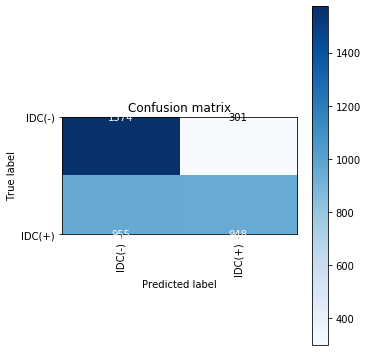

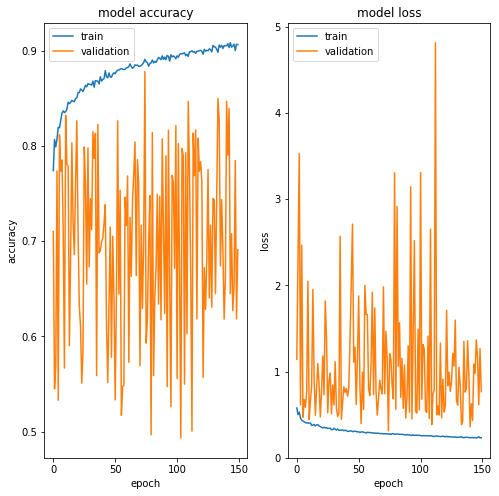

In [0]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
y_pred = model.predict(X_test_reshape)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(Y_test_c,axis=1)
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_cm(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()
plot_lc(history)
plt.show()

In [0]:
print(confusion_matrix(Y_true, Y_pred_classes))
from sklearn import metrics
print(metrics.classification_report(Y_true, Y_pred_classes))


[[1574  301]
 [ 955  948]]
              precision    recall  f1-score   support

           0       0.62      0.84      0.71      1875
           1       0.76      0.50      0.60      1903

    accuracy                           0.67      3778
   macro avg       0.69      0.67      0.66      3778
weighted avg       0.69      0.67      0.66      3778



In [0]:
cm= confusion_matrix(Y_true, Y_pred_classes)
sensitivity= cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )
secificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ',secificity)

Sensitivity :  0.4981607987388334
Specificity :  0.8394666666666667


In [0]:
from sklearn.metrics import auc,roc_curve
#  ROC curve
fpr, tpr, thresholds = roc_curve(Y_true, y_pred[:,1], pos_label=1)

#  ROC area
pred_score = auc(fpr, tpr)
print(f'Area Under Curve is {pred_score}')

Area Under Curve is 0.7869687861271676


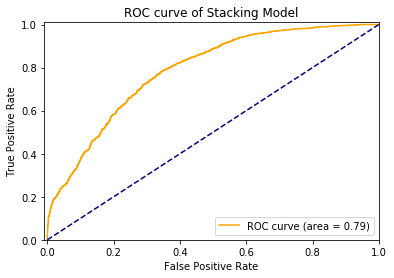

In [0]:
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % pred_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Stacking Model')
plt.legend(loc="lower right")

In [0]:
pred = model.predict(X_test_reshape)
pred_x = []
for i in range(len(pred)):
  if pred[i,1]>0.5:
    pred_x.append(1)
  else:
    pred_x.append(0)

a = []
b = 0
for i in range(len(pred)):
  if pred_x[i] == Y_test_c[i,1]:
    a.append('yes')
    b=b+1
  else:
    a.append('no')
type(a)
df = pd.DataFrame(a, columns=['Stacking'])
print(df)
df.to_csv('yes-no-stacking.csv', index=False, header=True)

     Stacking
0         yes
1         yes
2         yes
3          no
4          no
...       ...
3773      yes
3774       no
3775      yes
3776      yes
3777      yes

[3778 rows x 1 columns]


In [0]:
X_12242=np.load('./X_patient12242.npy')
X_12242=X_12242/255
y_pred_12242 = model.predict(X_12242)

In [0]:
y_pred_12242 = model.predict(X_12242)
np.save('./y_pred_12242_stack.npy',y_pred_12242)

In [0]:
y_pred_12242=np.load('y_pred_12242_stack.npy')

In [0]:
print(y_pred_12242[0:100])

[[9.95440364e-01 4.55959653e-03]
 [9.51725900e-01 4.82741669e-02]
 [9.09550428e-01 9.04495940e-02]
 [9.91552770e-01 8.44715163e-03]
 [9.98372257e-01 1.62780797e-03]
 [9.32024240e-01 6.79757074e-02]
 [2.66972750e-01 7.33027220e-01]
 [8.99781108e-01 1.00218885e-01]
 [9.95129108e-01 4.87093441e-03]
 [9.93717909e-01 6.28205668e-03]
 [9.96785760e-01 3.21422052e-03]
 [9.98786509e-01 1.21349073e-03]
 [9.70688462e-01 2.93116011e-02]
 [9.92333293e-01 7.66672334e-03]
 [8.96264791e-01 1.03735231e-01]
 [3.05690020e-01 6.94309950e-01]
 [9.82618928e-01 1.73811205e-02]
 [9.72285926e-01 2.77140383e-02]
 [9.87630188e-01 1.23698078e-02]
 [4.40052330e-01 5.59947670e-01]
 [9.94178295e-01 5.82168391e-03]
 [9.96526897e-01 3.47307115e-03]
 [9.67225671e-01 3.27743366e-02]
 [9.91877317e-01 8.12273007e-03]
 [9.57550228e-01 4.24497984e-02]
 [9.57067668e-01 4.29323204e-02]
 [8.38570595e-01 1.61429405e-01]
 [9.76862311e-01 2.31377147e-02]
 [9.92419779e-01 7.58021791e-03]
 [9.93333876e-01 6.66613271e-03]
 [9.882005

In [0]:
label=[]
i=0
for line in y_pred_12242:
  if line[0]>=0.5:
    label.append(0)
  else:
    label.append(1)
  i=i+1

In [0]:
y_pred_12242_new=np.c_[y_pred_12242,label]

example_df=pd.read_pickle("patient12242_coordinate.pkl")
example_df['target_new']=y_pred_12242_new[:,2].tolist()

example_df["target_new"]=example_df['target_new'].astype(int)
example_df

,x,y,target,path,target_new
0,1001,251,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
1,1001,301,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
2,1001,451,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
3,1001,401,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
4,1001,351,0,/content/drive/My Drive/IDC/12242/0/12242_idx5...,0
...,...,...,...,...,...
424,2501,951,1,/content/drive/My Drive/IDC/12242/1/12242_idx5...,0
425,2451,851,1,/content/drive/My Drive/IDC/12242/1/12242_idx5...,1
426,2451,951,1,/content/drive/My Drive/IDC/12242/1/12242_idx5...,0
427,2451,901,1,/content/drive/My Drive/IDC/12242/1/12242_idx5...,1


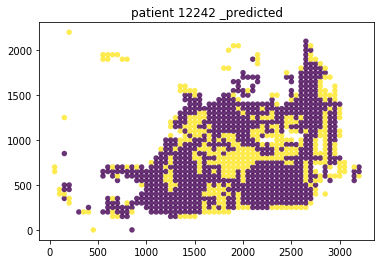

In [0]:
from pandas import api 
from pandas.api import types 
from pandas.api.types import is_numeric_dtype

import numpy as np

import matplotlib.pyplot as plt
from  matplotlib.pyplot import scatter

x=example_df['x']
y=example_df['y']
data = example_df[['x','y', 'target_new']]
colors = ("grey", "red")
groups = ("0","1")

# Create plot
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y, alpha=0.8, edgecolor='none', s=30, c=data.target_new )
#for data, color, group in zip(data, colors, groups):
# x,y=data
#  ax.scatter(x, y, alpha=0.8, c=colors, edgecolor='none', s=30, label=group)
plt.title('patient 12242 _predicted')


plt.show()

In [0]:
X_10253=np.load('./X_patient10253_CNN.npy')
XX_10253 = X_10253/255

y_pred_10253=model.predict(XX_10253)
np.save('./y_pred_10253_cnn.npy',y_pred_10253)

y_pred_10253=np.load('y_pred_10253_cnn.npy')

In [0]:
print(y_pred_10253[0:10])

[[1.0000000e+00 1.1726098e-10]
 [8.5907722e-01 1.4092277e-01]
 [8.8379043e-01 1.1620962e-01]
 [8.1135511e-01 1.8864489e-01]
 [9.9978703e-01 2.1296692e-04]
 [9.8000288e-01 1.9997120e-02]
 [7.0287395e-01 2.9712600e-01]
 [9.9426502e-01 5.7349978e-03]
 [9.9986136e-01 1.3859318e-04]
 [9.8164970e-01 1.8350301e-02]]


In [0]:
label=[]
i=0
for line in y_pred_10253:
  if line[0]>=0.5:
    label.append(0)
  else:
    label.append(1)
  i=i+1

y_pred_10253_new=np.c_[y_pred_10253,label]

example_df=pd.read_pickle("patient10253_coordinate.pkl")
example_df['target_new']=y_pred_10253_new[:,2].tolist()

example_df["target_new"]=example_df['target_new'].astype(int)
example_df

,x,y,target,path,target_new
0,1001,1001,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
1,1001,1151,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
2,1001,1551,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
3,1001,1201,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
4,1001,1301,0,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
...,...,...,...,...,...
65,851,501,1,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
66,851,751,1,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
67,851,551,1,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0
68,851,651,1,/content/drive/My Drive/IDC_regular_ps50_idx5/...,0


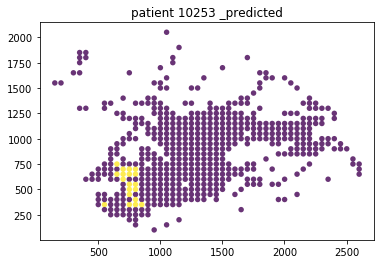

In [0]:
from pandas import api 
from pandas.api import types 
from pandas.api.types import is_numeric_dtype

import numpy as np

import matplotlib.pyplot as plt
from  matplotlib.pyplot import scatter

x=example_df['x']
y=example_df['y']
data = example_df[['x','y', 'target_new']]
colors = ("grey", "red")
groups = ("0","1")

# Create plot
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y, alpha=0.8, edgecolor='none', s=30, c=data.target_new )
#for data, color, group in zip(data, colors, groups):
# x,y=data
#  ax.scatter(x, y, alpha=0.8, c=colors, edgecolor='none', s=30, label=group)
plt.title('patient 10253 _predicted')


plt.show()

In [0]:
from sklearn.externals import joblib
joblib.dump(model, "train_model_stack.m")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['train_model_stack.m']